In [1]:
# 匯入資料
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression

datasetTrain = pd.read_csv('adult.data.csv')
datasetTest = pd.read_csv('adult.test.csv')

# 預處理
fliter1 = (datasetTrain["country"] != ' ?')
fliter2 = (datasetTrain["occupation"] != ' ?')
fliter3 = (datasetTrain["workclass"] != ' ?')
datasetTrain2 = datasetTrain[fliter1 & fliter2 & fliter3]

In [2]:
# 資料數值化
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
datasetTrain2['workclass'] = labelencoder.fit_transform(datasetTrain2['workclass'])
datasetTrain2['education'] = labelencoder.fit_transform(datasetTrain2['education'])
datasetTrain2['marital-status'] = labelencoder.fit_transform(datasetTrain2['marital-status'])
datasetTrain2['occupation'] = labelencoder.fit_transform(datasetTrain2['occupation'])
datasetTrain2['relationship'] = labelencoder.fit_transform(datasetTrain2['relationship'])
datasetTrain2['race'] = labelencoder.fit_transform(datasetTrain2['race'])
datasetTrain2['sex'] = labelencoder.fit_transform(datasetTrain2['sex'])
datasetTrain2['country'] = labelencoder.fit_transform(datasetTrain2['country'])
datasetTrain2['income'] = labelencoder.fit_transform(datasetTrain2['income'])
datasetTrain2

<ipython-input-2-d345d00e2f26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrain2['workclass'] = labelencoder.fit_transform(datasetTrain2['workclass'])
<ipython-input-2-d345d00e2f26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrain2['education'] = labelencoder.fit_transform(datasetTrain2['education'])
<ipython-input-2-d345d00e2f26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [3]:
# 設定答案
dataset_target = datasetTrain2.pop('hours-per-week')
dataset_target.loc()[dataset_target == 0]=0.1
dataset_target

C:\Users\xxss1\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\xxss1\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


0        40.0
1        13.0
2        40.0
3        40.0
4        40.0
         ... 
32556    38.0
32557    40.0
32558    40.0
32559    20.0
32560    40.0
Name: hours-per-week, Length: 30162, dtype: float64

In [4]:
# 分割資料
from sklearn.model_selection import train_test_split
datasetTrain2 = pd.get_dummies(datasetTrain2)
X_train, X_test, Y_train, Y_test = train_test_split( datasetTrain2 , dataset_target , test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape)

(24129, 14) (6033, 14)


In [5]:
# 正規化
X_train = X_train.values.reshape(24129, 14)
X_test = X_test.values.reshape(6033, 14)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#正規化測試資料 (0到1之間)
X_train /= 255
X_test /= 255

In [6]:
#建立Sequential物件
network = models.Sequential()
network.add(layers.Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='sgd', loss='MAE',metrics=[tf.keras.metrics.mae,tf.keras.metrics.mape,tf.metrics.mse] )
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                225       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,078
Trainable params: 1,078
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=250)

Epoch 1/50
97/97 [==============================] - 0s 470us/step - loss: 131.7012 - mean_absolute_error: 131.7012 - mean_absolute_percentage_error: 356.6396 - mean_squared_error: 1034176.6250
Epoch 2/50
97/97 [==============================] - 0s 511us/step - loss: 32.9299 - mean_absolute_error: 32.9299 - mean_absolute_percentage_error: 79.1091 - mean_squared_error: 1254.8259
Epoch 3/50
97/97 [==============================] - 0s 524us/step - loss: 7.6808 - mean_absolute_error: 7.6808 - mean_absolute_percentage_error: 29.7854 - mean_squared_error: 146.5224
Epoch 4/50
97/97 [==============================] - 0s 512us/step - loss: 7.4649 - mean_absolute_error: 7.4649 - mean_absolute_percentage_error: 29.4956 - mean_squared_error: 143.2762
Epoch 5/50
97/97 [==============================] - 0s 481us/step - loss: 7.4651 - mean_absolute_error: 7.4651 - mean_absolute_percentage_error: 29.5473 - mean_squared_error: 143.3005
Epoch 6/50
97/97 [==============================] - 0s 475us/step - 

97/97 [==============================] - 0s 519us/step - loss: 7.4296 - mean_absolute_error: 7.4296 - mean_absolute_percentage_error: 29.3978 - mean_squared_error: 142.9927
Epoch 46/50
97/97 [==============================] - 0s 504us/step - loss: 7.4253 - mean_absolute_error: 7.4253 - mean_absolute_percentage_error: 29.4550 - mean_squared_error: 142.9477
Epoch 47/50
97/97 [==============================] - 0s 479us/step - loss: 7.4283 - mean_absolute_error: 7.4283 - mean_absolute_percentage_error: 29.4410 - mean_squared_error: 142.7721
Epoch 48/50
97/97 [==============================] - 0s 470us/step - loss: 7.4301 - mean_absolute_error: 7.4301 - mean_absolute_percentage_error: 29.3920 - mean_squared_error: 143.0417
Epoch 49/50
97/97 [==============================] - 0s 463us/step - loss: 7.4221 - mean_absolute_error: 7.4221 - mean_absolute_percentage_error: 29.4088 - mean_squared_error: 142.9139
Epoch 50/50
97/97 [==============================] - 0s 450us/step - loss: 7.4298 - mea

In [8]:
network.predict(X_train)

array([[39.131546],
       [39.131546],
       [39.131546],
       ...,
       [39.131546],
       [39.131546],
       [39.131546]], dtype=float32)

In [9]:
X_train

array([[1.3333334e-01, 7.8431377e-03, 7.2633728e+02, ..., 0.0000000e+00,
        1.4901961e-01, 0.0000000e+00],
       [2.0000000e-01, 7.8431377e-03, 3.7305099e+02, ..., 0.0000000e+00,
        1.4901961e-01, 0.0000000e+00],
       [1.9607843e-01, 7.8431377e-03, 1.0991294e+03, ..., 0.0000000e+00,
        1.4901961e-01, 0.0000000e+00],
       ...,
       [1.9607843e-01, 7.8431377e-03, 2.8372940e+02, ..., 0.0000000e+00,
        1.4901961e-01, 0.0000000e+00],
       [1.9215687e-01, 1.5686275e-02, 1.0336000e+03, ..., 0.0000000e+00,
        1.4901961e-01, 3.9215689e-03],
       [1.3333334e-01, 7.8431377e-03, 7.1441962e+02, ..., 0.0000000e+00,
        1.4901961e-01, 0.0000000e+00]], dtype=float32)

# 測試

In [10]:
# 匯入adult.test做測試
datasetTest = pd.read_csv('adult.test.csv')
fliter1 = (datasetTest["country"] != ' ?')
fliter2 = (datasetTest["occupation"] != ' ?')
fliter3 = (datasetTest["workclass"] != ' ?')
datasetTest2 = datasetTest[fliter1 & fliter2 & fliter3]

In [11]:
# 資料數值化
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
datasetTest2['workclass'] = labelencoder.fit_transform(datasetTest2['workclass'])
datasetTest2['education'] = labelencoder.fit_transform(datasetTest2['education'])
datasetTest2['marital-status'] = labelencoder.fit_transform(datasetTest2['marital-status'])
datasetTest2['occupation'] = labelencoder.fit_transform(datasetTest2['occupation'])
datasetTest2['relationship'] = labelencoder.fit_transform(datasetTest2['relationship'])
datasetTest2['race'] = labelencoder.fit_transform(datasetTest2['race'])
datasetTest2['sex'] = labelencoder.fit_transform(datasetTest2['sex'])
datasetTest2['country'] = labelencoder.fit_transform(datasetTest2['country'])
datasetTest2['income'] = labelencoder.fit_transform(datasetTest2['income'])
datasetTest2

<ipython-input-11-e096b4b273b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTest2['workclass'] = labelencoder.fit_transform(datasetTest2['workclass'])
<ipython-input-11-e096b4b273b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTest2['education'] = labelencoder.fit_transform(datasetTest2['education'])
<ipython-input-11-e096b4b273b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,9,13,4,9,3,4,1,0,0,40,37,0
16276,39,2,215419,9,13,0,9,1,4,0,0,0,36,37,0
16278,38,2,374983,9,13,2,9,0,4,1,0,0,50,37,0
16279,44,2,83891,9,13,0,0,3,1,1,5455,0,40,37,0


In [12]:
# 設定答案
Truedata = datasetTest2["hours-per-week"]
Testdata = datasetTest2.drop("hours-per-week",1)
# 正規化
Testdata = Testdata.values.reshape(15060, 14)
Testdata = Testdata.astype('float32')

#正規化測試資料 (0到1之間)
Testdata  /= 255

Y_predicted = network.predict(Testdata)

In [13]:
Y_predicted 

array([[39.131546],
       [39.131546],
       [39.131546],
       ...,
       [39.131546],
       [39.131546],
       [39.131546]], dtype=float32)

In [14]:
AVRvalue = pd.DataFrame(Truedata).mean()
Truedata.loc()[Truedata == 0] = AVRvalue[0]

C:\Users\xxss1\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\xxss1\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [15]:
Testdata

array([[9.8039217e-02, 7.8431377e-03, 8.8941962e+02, ..., 0.0000000e+00,
        1.4509805e-01, 0.0000000e+00],
       [1.4901961e-01, 7.8431377e-03, 3.5221176e+02, ..., 0.0000000e+00,
        1.4509805e-01, 0.0000000e+00],
       [1.0980392e-01, 3.9215689e-03, 1.3213765e+03, ..., 0.0000000e+00,
        1.4509805e-01, 3.9215689e-03],
       ...,
       [1.4901961e-01, 7.8431377e-03, 1.4705216e+03, ..., 0.0000000e+00,
        1.4509805e-01, 0.0000000e+00],
       [1.7254902e-01, 7.8431377e-03, 3.2898431e+02, ..., 0.0000000e+00,
        1.4509805e-01, 0.0000000e+00],
       [1.3725491e-01, 1.1764706e-02, 7.1430591e+02, ..., 0.0000000e+00,
        1.4509805e-01, 3.9215689e-03]], dtype=float32)

In [16]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

mse = mean_squared_error(Truedata, Y_predicted)
mae = mean_absolute_error(Truedata, Y_predicted)
mape= mean_absolute_percentage_error(Truedata, Y_predicted)

In [17]:
print(mse,
     mae,
     mape)

148.96695773766044 7.647769962237334 0.3001395728620421


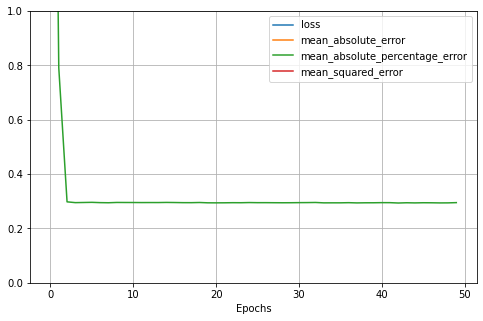

In [18]:
#輸出圖表
history.history['mean_absolute_percentage_error']=list(map(lambda x:x/100, history.history['mean_absolute_percentage_error']))
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.show() 

In [19]:
Y_predicted

array([[39.131546],
       [39.131546],
       [39.131546],
       ...,
       [39.131546],
       [39.131546],
       [39.131546]], dtype=float32)